# Importing Modules for project

In [249]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Using pandas.read_csv function, I will read in the data for my project. I will then use the .merge function to merge my to datasets by the player column in both datasets. This will give me the Fantasy points and when the player was drafted on average in the same dataset.

In [250]:
df = pd.read_csv('fantasyfootball.csv')
df_2 = pd.read_csv('fantasyfootballrank.csv')
final_df = pd.merge(df, df_2, on = "Player", how = "inner")
final_df.head()

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,VBD,PosRank,OvRank,-9999,RK,Team,Position,AVG,Min,Max
0,1,Patrick Mahomes,KAN,QB,27,17,17,435,648,5250,...,136.0,1,1.0,MahoPa00,47,KC,QB,52.4,40.0,69.0
1,2,Josh Jacobs,LVR,RB,24,17,17,0,0,0,...,127.0,1,2.0,JacoJo01,54,LV,RB,56.0,44.0,64.0
2,3,Christian McCaffrey,2TM,RB,26,17,16,1,1,34,...,123.0,2,3.0,McCaCh01,1,CAR,RB,1.2,1.0,2.0
3,5,Justin Jefferson,MIN,WR,23,17,17,2,2,34,...,119.0,1,5.0,JeffJu00,5,MIN,WR,6.0,3.0,10.0
4,6,Austin Ekeler,LAC,RB,27,17,17,0,0,0,...,118.0,4,6.0,EkelAu00,3,LAC,RB,4.4,2.0,7.0


# Clean Data

Now, I will clean my data to get my dataset in a format that I want to work with. There are many columns that I don't need. I will use .drop function to remove those. I also have columns that need to be renamed so I'll use the .rename function to name these so it is easier to know what the column represents.

In [251]:
final_df = final_df.drop(['Fmb','FL','2PM' ,'2PP', 'DKPt' , 'FDPt' , 'VBD' , 'PosRank' , 'OvRank' , '-9999', 'Team' , 'Position', 'Min' , 'Max','Rk', 'RK', ], axis=1)
final_df = final_df.rename(columns={'Tm': 'Team', 'FantPos': 'Position', 'Yds': 'PassingYds','TD.3': 'AllTD', 'Att': 'PassAtt', 'Yds.2': 'RecYds', 'TD.2': 'RecTD','TD.1':'RushTD','TD':'PassTD','Att.1': 'RushAtt', 'Yd.1':'RushYds','PPR': 'FantasyPoints', 'AVG': 'AverageDraftPosition','Yds.1': 'RushYds'})
final_df.head()

,Player,Team,Position,Age,G,GS,Cmp,PassAtt,PassingYds,PassTD,...,RushTD,Tgt,Rec,RecYds,Y/R,RecTD,AllTD,FantPt,FantasyPoints,AverageDraftPosition
0,Patrick Mahomes,KAN,QB,27,17,17,435,648,5250,41,...,4,1,1,6,6.00,0,4,416.0,417.4,52.4
1,Josh Jacobs,LVR,RB,24,17,17,0,0,0,0,...,12,64,53,400,7.55,0,12,275.0,328.3,56.0
2,Christian McCaffrey,2TM,RB,26,17,16,1,1,34,1,...,8,108,85,741,8.72,5,13,271.0,356.4,1.2
3,Justin Jefferson,MIN,WR,23,17,17,2,2,34,0,...,1,184,128,1809,14.13,8,9,241.0,368.7,6.0
4,Austin Ekeler,LAC,RB,27,17,17,0,0,0,0,...,13,127,107,722,6.75,5,18,266.0,372.7,4.4


# Analyze Data

I want to put the data into separate dataframes based on the position the football player plays. This will allow me to view the data for each position individually and then I can view them in comparison with each other. I will create each dataframe for running backs, quarterbacks, wide recievers, and tight ends. I will then create variables equal to the columns I want to include for each. I then create a function that allows me set the columns equal to each dataframe represent by position.

In [252]:

rushing_column = ['RushAtt', 'RushYds', 'Y/A', 'RushTD', 'AllTD']
recieving_column = ['Tgt', 'Rec', 'RecYds', 'Y/R', 'RecTD']
passing_column = ['Cmp', 'PassAtt', 'PassingYds', 'PassTD', 'Int']


def separate_position_df(df, position):
    return df[df['Position'] == position]

rb_df = separate_position_df(final_df, 'RB')
qb_df = separate_position_df(final_df, 'QB')
wr_df = separate_position_df(final_df, 'WR')
te_df = separate_position_df(final_df, 'TE')

rb_df.head()




,Player,Team,Position,Age,G,GS,Cmp,PassAtt,PassingYds,PassTD,...,RushTD,Tgt,Rec,RecYds,Y/R,RecTD,AllTD,FantPt,FantasyPoints,AverageDraftPosition
1,Josh Jacobs,LVR,RB,24,17,17,0,0,0,0,...,12,64,53,400,7.55,0,12,275.0,328.3,56.0
2,Christian McCaffrey,2TM,RB,26,17,16,1,1,34,1,...,8,108,85,741,8.72,5,13,271.0,356.4,1.2
4,Austin Ekeler,LAC,RB,27,17,17,0,0,0,0,...,13,127,107,722,6.75,5,18,266.0,372.7,4.4
8,Nick Chubb,CLE,RB,27,17,17,0,0,0,0,...,12,37,27,239,8.85,1,13,254.0,281.4,29.6
13,Saquon Barkley,NYG,RB,25,16,16,0,0,0,0,...,10,76,57,338,5.93,0,10,227.0,284.0,12.4


In [253]:
def position_columns(df, new_column):
    df = df[['Player', 'Position', 'Team', 'G', 'GS','FantasyPoints', 'Age', 'AverageDraftPosition'] + new_column]
    return df

position_columns(wr_df, recieving_column+rushing_column)

,Player,Position,Team,G,GS,FantasyPoints,Age,AverageDraftPosition,Tgt,Rec,RecYds,Y/R,RecTD,RushAtt,RushYds,Y/A,RushTD,AllTD
3,Justin Jefferson,WR,MIN,17,17,368.7,23,6.0,184,128,1809,14.13,8,4,24,6.00,1,9
7,Davante Adams,WR,LVR,17,17,335.5,30,13.2,180,100,1516,15.16,14,3,-1,-0.33,0,14
9,Tyreek Hill,WR,MIA,17,17,347.2,28,29.2,170,119,1710,14.37,7,7,32,4.57,1,9
11,A.J. Brown,WR,PHI,17,16,299.6,25,22.6,145,88,1496,17.00,11,0,0,NaN,0,11
12,Stefon Diggs,WR,BUF,16,16,316.6,29,11.4,154,108,1429,13.23,11,1,-3,-3.00,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,Dezmon Patmon,WR,IND,1,0,4.4,24,375.0,6,2,24,12.00,0,0,0,NaN,0,0
343,Jalen Tolbert,WR,DAL,8,1,3.2,23,153.0,3,2,12,6.00,0,0,0,NaN,0,0
344,Montrell Washington,WR,DEN,15,1,5.2,23,392.0,9,4,2,0.50,0,5,30,6.00,0,0
352,Deonte Harty,WR,NOR,4,0,1.3,25,270.0,2,2,13,6.50,0,0,0,NaN,0,0


In [254]:
position_columns(qb_df, passing_column+rushing_column)
qb_df.head()

,Player,Team,Position,Age,G,GS,Cmp,PassAtt,PassingYds,PassTD,...,RushTD,Tgt,Rec,RecYds,Y/R,RecTD,AllTD,FantPt,FantasyPoints,AverageDraftPosition
0,Patrick Mahomes,KAN,QB,27,17,17,435,648,5250,41,...,4,1,1,6,6.0,0,4,416.0,417.4,52.40
5,Josh Allen,BUF,QB,26,16,16,359,567,4283,35,...,7,0,0,0,NaN,0,7,396.0,395.5,36.00
10,Jalen Hurts,PHI,QB,24,15,15,306,460,3701,22,...,13,0,0,0,NaN,0,13,378.0,378.0,59.60
15,Joe Burrow,CIN,QB,26,16,16,414,606,4475,35,...,5,0,0,0,NaN,0,5,351.0,350.7,72.00
39,Geno Smith,SEA,QB,32,17,17,399,572,4282,30,...,1,0,0,0,NaN,0,1,304.0,303.9,360.75


In [255]:
position_columns(te_df, recieving_column+rushing_column)
te_df.head()

,Player,Team,Position,Age,G,GS,Cmp,PassAtt,PassingYds,PassTD,...,RushTD,Tgt,Rec,RecYds,Y/R,RecTD,AllTD,FantPt,FantasyPoints,AverageDraftPosition
6,Travis Kelce,KAN,TE,33,17,17,0,0,0,0,...,0,152,110,1338,12.16,12,12,206.0,316.3,14.0
21,George Kittle,SFO,TE,29,15,15,0,0,0,0,...,0,86,60,765,12.75,11,11,141.0,200.5,51.4
23,Taysom Hill,NOR,TE,32,16,8,13,19,240,2,...,7,13,9,77,8.56,2,9,137.0,145.8,345.0
27,T.J. Hockenson,2TM,TE,25,17,14,0,0,0,0,...,0,129,86,914,10.63,6,6,129.0,215.4,84.4
38,Mark Andrews,BAL,TE,27,15,15,0,0,0,0,...,0,113,73,847,11.60,5,5,118.0,190.5,22.4


In [256]:
position_columns(rb_df, recieving_column+rushing_column)
rb_df.head()

,Player,Team,Position,Age,G,GS,Cmp,PassAtt,PassingYds,PassTD,...,RushTD,Tgt,Rec,RecYds,Y/R,RecTD,AllTD,FantPt,FantasyPoints,AverageDraftPosition
1,Josh Jacobs,LVR,RB,24,17,17,0,0,0,0,...,12,64,53,400,7.55,0,12,275.0,328.3,56.0
2,Christian McCaffrey,2TM,RB,26,17,16,1,1,34,1,...,8,108,85,741,8.72,5,13,271.0,356.4,1.2
4,Austin Ekeler,LAC,RB,27,17,17,0,0,0,0,...,13,127,107,722,6.75,5,18,266.0,372.7,4.4
8,Nick Chubb,CLE,RB,27,17,17,0,0,0,0,...,12,37,27,239,8.85,1,13,254.0,281.4,29.6
13,Saquon Barkley,NYG,RB,25,16,16,0,0,0,0,...,10,76,57,338,5.93,0,10,227.0,284.0,12.4


I want to create two new columns to add to my data. I want a column for Fantasy Points per game. To do this I will divide the FantasyPoints column by the Games(G) column. I also want a Usage column. This will represent the amount of time a player gets the ball. For running backs this is rushing attempts(RushAtt) and Passing Targets(Tgt). 

In [257]:
def calculate_fantasy_points_per_game(df, position):
    position_df = df[df['Position'] == position]
    position_df['FantasyPoints/GM'] = position_df['FantasyPoints'] / position_df['G']
    position_df['FantasyPoints/GM'] = position_df['FantasyPoints/GM'].apply(lambda x: round(x, 2))
    return position_df



calculate_fantasy_points_per_game(rb_df, 'RB')

rb_df = calculate_fantasy_points_per_game(rb_df, 'RB')
rb_df.head()

,Player,Team,Position,Age,G,GS,Cmp,PassAtt,PassingYds,PassTD,...,Tgt,Rec,RecYds,Y/R,RecTD,AllTD,FantPt,FantasyPoints,AverageDraftPosition,FantasyPoints/GM
1,Josh Jacobs,LVR,RB,24,17,17,0,0,0,0,...,64,53,400,7.55,0,12,275.0,328.3,56.0,19.31
2,Christian McCaffrey,2TM,RB,26,17,16,1,1,34,1,...,108,85,741,8.72,5,13,271.0,356.4,1.2,20.96
4,Austin Ekeler,LAC,RB,27,17,17,0,0,0,0,...,127,107,722,6.75,5,18,266.0,372.7,4.4,21.92
8,Nick Chubb,CLE,RB,27,17,17,0,0,0,0,...,37,27,239,8.85,1,13,254.0,281.4,29.6,16.55
13,Saquon Barkley,NYG,RB,25,16,16,0,0,0,0,...,76,57,338,5.93,0,10,227.0,284.0,12.4,17.75


In [258]:
calculate_fantasy_points_per_game(wr_df, 'WR')

wr_df = calculate_fantasy_points_per_game(wr_df, 'WR')
wr_df.head()

,Player,Team,Position,Age,G,GS,Cmp,PassAtt,PassingYds,PassTD,...,Tgt,Rec,RecYds,Y/R,RecTD,AllTD,FantPt,FantasyPoints,AverageDraftPosition,FantasyPoints/GM
3,Justin Jefferson,MIN,WR,23,17,17,2,2,34,0,...,184,128,1809,14.13,8,9,241.0,368.7,6.0,21.69
7,Davante Adams,LVR,WR,30,17,17,0,0,0,0,...,180,100,1516,15.16,14,14,236.0,335.5,13.2,19.74
9,Tyreek Hill,MIA,WR,28,17,17,0,0,0,0,...,170,119,1710,14.37,7,9,228.0,347.2,29.2,20.42
11,A.J. Brown,PHI,WR,25,17,16,0,0,0,0,...,145,88,1496,17.00,11,11,212.0,299.6,22.6,17.62
12,Stefon Diggs,BUF,WR,29,16,16,0,0,0,0,...,154,108,1429,13.23,11,11,209.0,316.6,11.4,19.79


In [259]:
calculate_fantasy_points_per_game(te_df, 'TE')
te_df = calculate_fantasy_points_per_game(te_df, 'TE')
te_df.head()

,Player,Team,Position,Age,G,GS,Cmp,PassAtt,PassingYds,PassTD,...,Tgt,Rec,RecYds,Y/R,RecTD,AllTD,FantPt,FantasyPoints,AverageDraftPosition,FantasyPoints/GM
6,Travis Kelce,KAN,TE,33,17,17,0,0,0,0,...,152,110,1338,12.16,12,12,206.0,316.3,14.0,18.61
21,George Kittle,SFO,TE,29,15,15,0,0,0,0,...,86,60,765,12.75,11,11,141.0,200.5,51.4,13.37
23,Taysom Hill,NOR,TE,32,16,8,13,19,240,2,...,13,9,77,8.56,2,9,137.0,145.8,345.0,9.11
27,T.J. Hockenson,2TM,TE,25,17,14,0,0,0,0,...,129,86,914,10.63,6,6,129.0,215.4,84.4,12.67
38,Mark Andrews,BAL,TE,27,15,15,0,0,0,0,...,113,73,847,11.60,5,5,118.0,190.5,22.4,12.70


In [260]:
calculate_fantasy_points_per_game(qb_df, 'QB')
qb_df = calculate_fantasy_points_per_game(qb_df, 'QB')
qb_df.head()

,Player,Team,Position,Age,G,GS,Cmp,PassAtt,PassingYds,PassTD,...,Tgt,Rec,RecYds,Y/R,RecTD,AllTD,FantPt,FantasyPoints,AverageDraftPosition,FantasyPoints/GM
0,Patrick Mahomes,KAN,QB,27,17,17,435,648,5250,41,...,1,1,6,6.0,0,4,416.0,417.4,52.40,24.55
5,Josh Allen,BUF,QB,26,16,16,359,567,4283,35,...,0,0,0,NaN,0,7,396.0,395.5,36.00,24.72
10,Jalen Hurts,PHI,QB,24,15,15,306,460,3701,22,...,0,0,0,NaN,0,13,378.0,378.0,59.60,25.20
15,Joe Burrow,CIN,QB,26,16,16,414,606,4475,35,...,0,0,0,NaN,0,5,351.0,350.7,72.00,21.92
39,Geno Smith,SEA,QB,32,17,17,399,572,4282,30,...,0,0,0,NaN,0,1,304.0,303.9,360.75,17.88


I want to visualize each dataframe individually and then I will put all the dataframes together to visualize each dataset together. I will use Seaborn to do this.

# Running Back Visualization

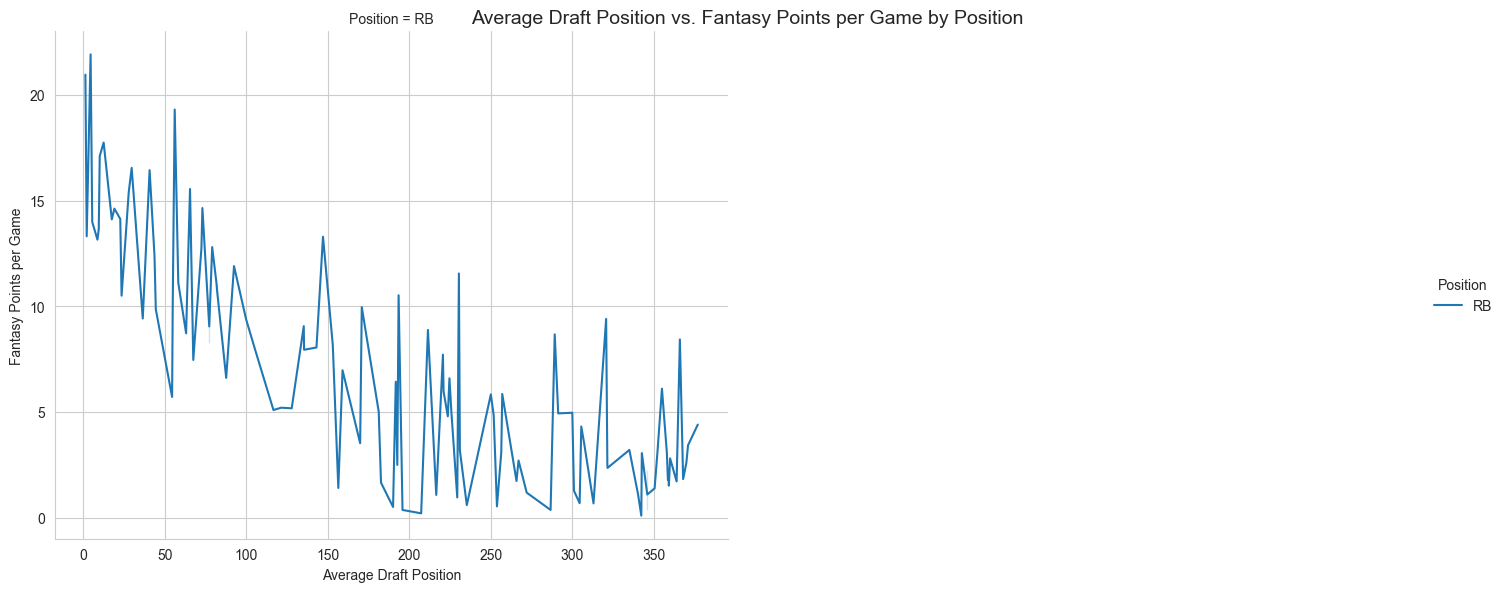

In [278]:
sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=rb_df, x='AverageDraftPosition', y='FantasyPoints/GM', hue='Position', palette=palette, kind='line', col='Position', col_wrap=2, height=6, aspect=1.2)



g.fig.suptitle('Average Draft Position vs. Fantasy Points per Game by Position', fontsize=14)
g.set_axis_labels('Average Draft Position', 'Fantasy Points per Game')



plt.show()





# Wide Reciever Visualization

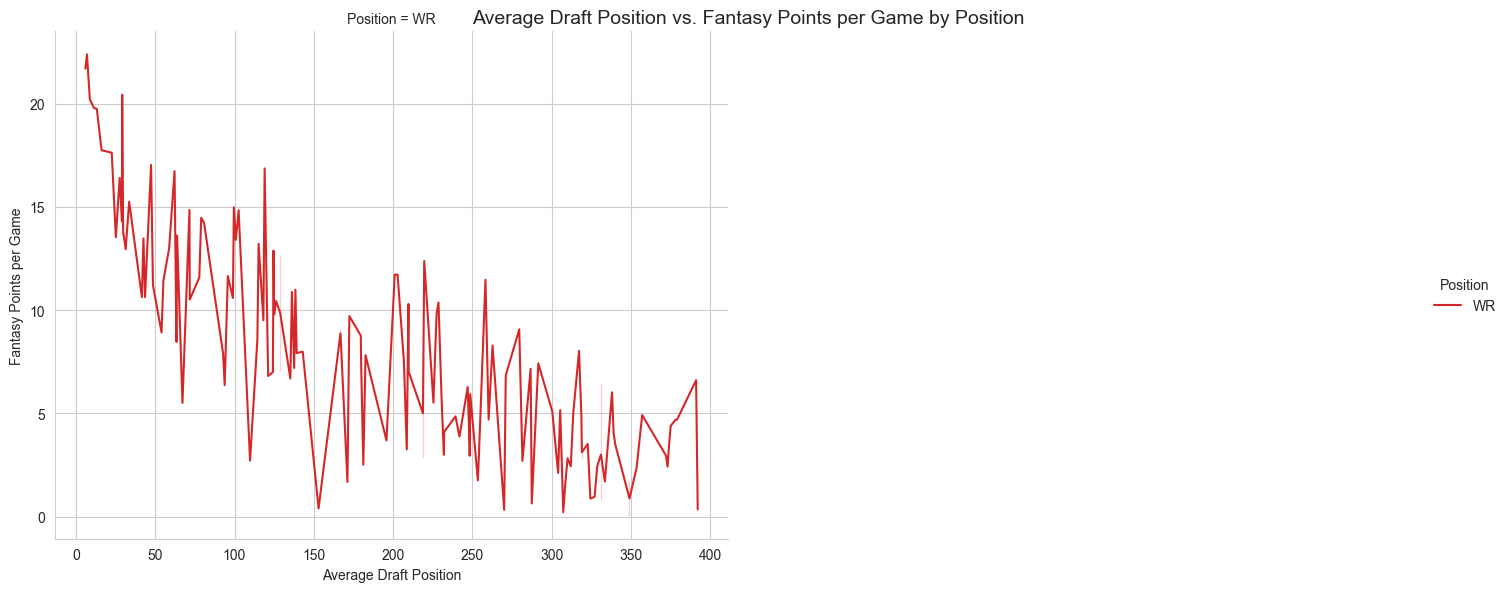

In [277]:
sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=wr_df, x='AverageDraftPosition', y='FantasyPoints/GM', hue='Position', palette=palette, kind='line', col='Position', col_wrap=2, height=6, aspect=1.2)



g.fig.suptitle('Average Draft Position vs. Fantasy Points per Game by Position', fontsize=14)
g.set_axis_labels('Average Draft Position', 'Fantasy Points per Game')

plt.show()

# Tight End Visualization

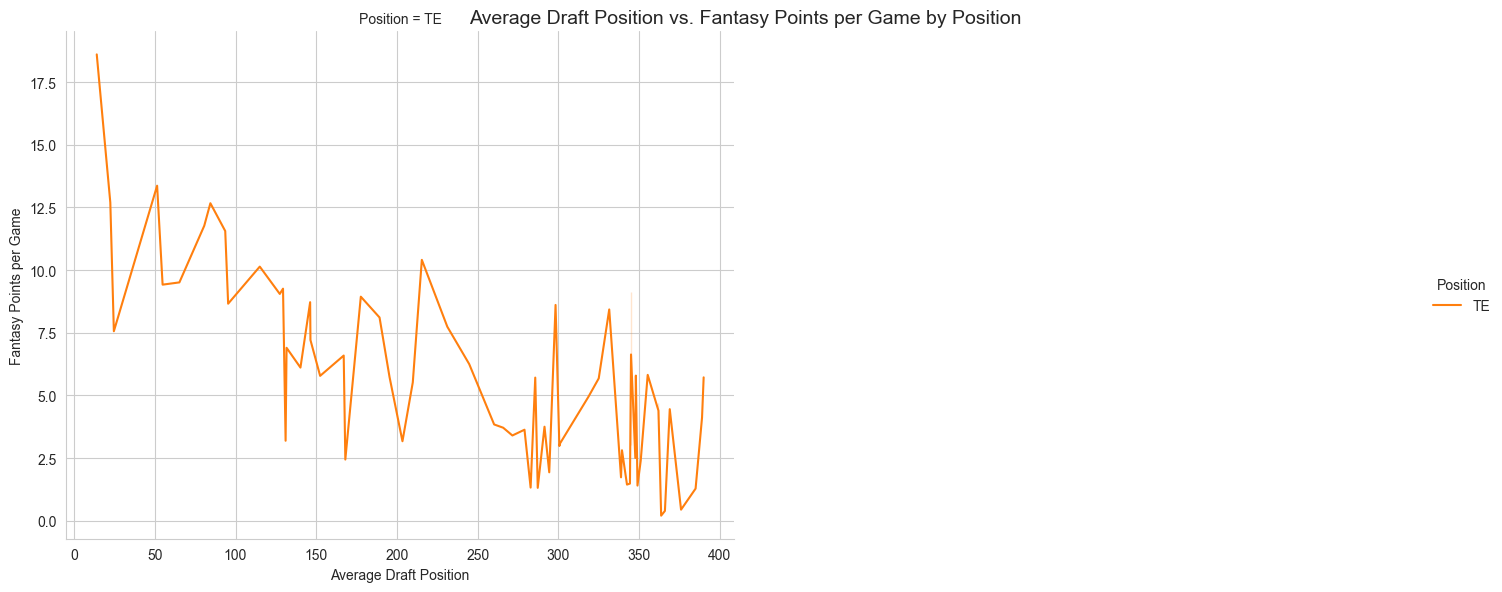

In [276]:
sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=te_df, x='AverageDraftPosition', y='FantasyPoints/GM', hue='Position', palette=palette, kind='line', col='Position', col_wrap=2, height=6, aspect=1.2)


g.fig.suptitle('Average Draft Position vs. Fantasy Points per Game by Position', fontsize=14)
g.set_axis_labels('Average Draft Position', 'Fantasy Points per Game')

plt.show()

# Quarterback Visualization

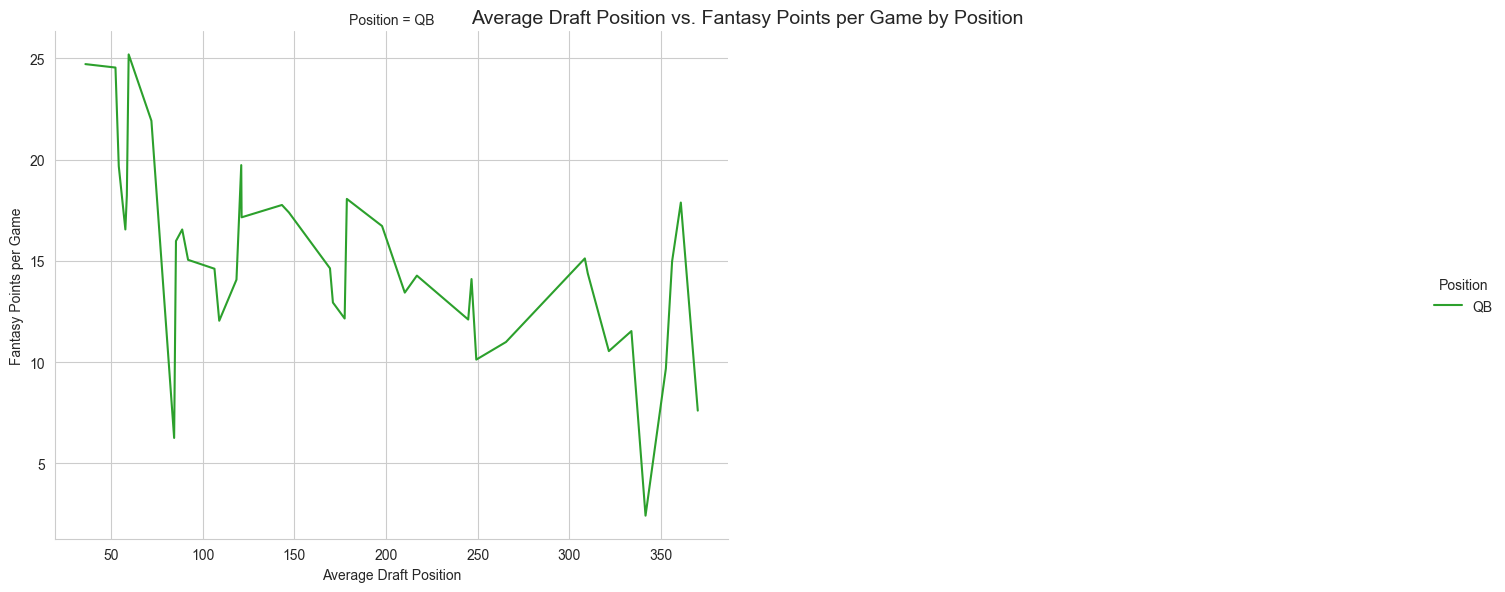

In [275]:
sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=qb_df, x='AverageDraftPosition', y='FantasyPoints/GM', hue='Position', palette=palette, kind='line', col='Position', col_wrap=2, height=6, aspect=1.2)


g.fig.suptitle('Average Draft Position vs. Fantasy Points per Game by Position', fontsize=14)
g.set_axis_labels('Average Draft Position', 'Fantasy Points per Game')

plt.show()

I will use the pd.concat to combine all the dataframes into one so I can view them in the same Plot all together.

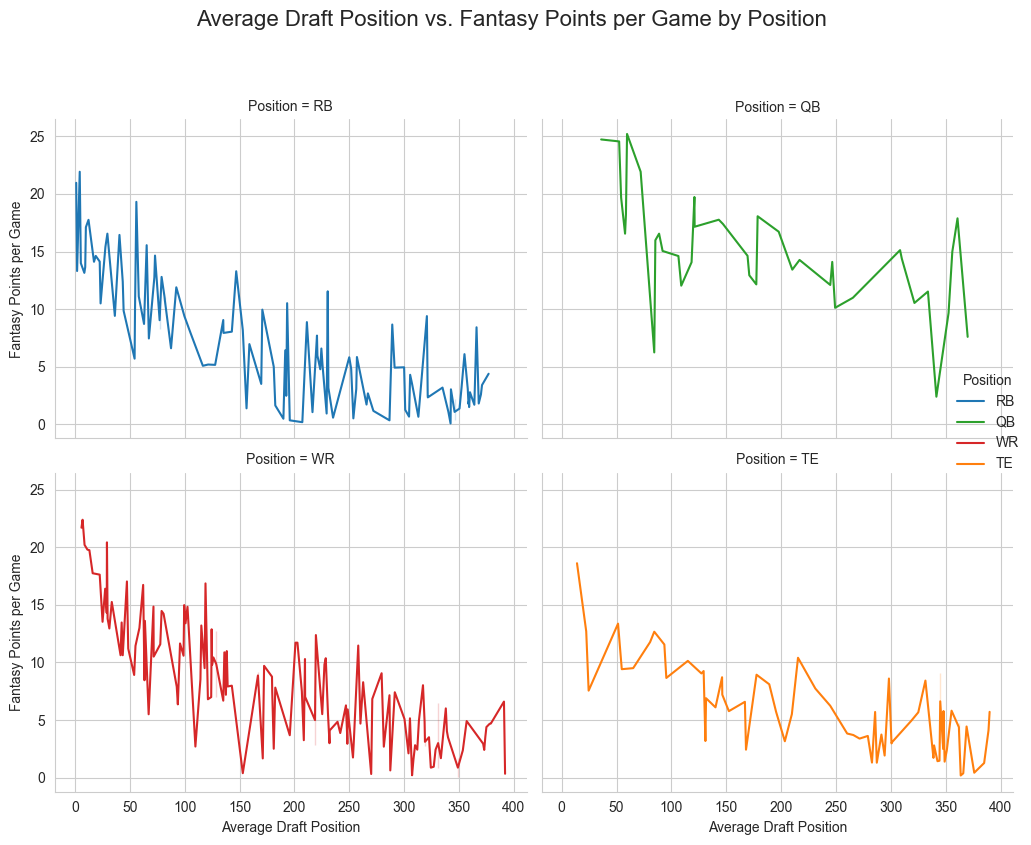

In [273]:
df_merged = pd.concat([rb_df, qb_df, wr_df, te_df], ignore_index=True, sort=False)

sns.set_style("whitegrid")
sns.set_palette("bright")

palette = {"RB":"tab:blue",
           "WR":"tab:red", 
           "QB":"tab:green","TE":"tab:orange"}

g = sns.relplot(data=df_merged, x='AverageDraftPosition', y='FantasyPoints/GM', hue='Position', palette=palette, kind='line', col='Position', col_wrap=2, height=4, aspect=1.2)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Average Draft Position vs. Fantasy Points per Game by Position', fontsize=16, y=1.05)
g.set_axis_labels('Average Draft Position', 'Fantasy Points per Game')
g.fig.tight_layout()









# Interpreting my Visulizations!

## So my results were as expected when I began this project, I knew there would be a regression as you got later into drafts. What I wanted to find from my data was how to prioritize the certain positions when I go into a draft. When looking at the data plots you can definitely see places late in the draft that you can find players that can bring a lot of value to your team. Looking at the tight end (TE) position, I can see that if I can get the top player at this position it can give me a significant advantage but if I miss and the player isn't the top of the position I may be in for a tough season. Looking at the data plots, I believe I should priortize the quarterback (QB) and running back (RB) positions. The value of these positions seem to significantly decrease as the draft progresses. I feel that the Wide Reciever position (WR) is a place where I can find value later and the draft. I think this will allow me to maximize the value of my team during the draft. In the second part of this class, I want to bring in more datasets from past seasons to see if I can identify trends to continue to help me find the best value in fantasy drafts. I'm looking forward to continuing this project and learning more about the trends of my data.